In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Define custom scorers
scoring = {
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

for task_name, task_df in tasks.items():
    print(f"\n### {task_name} ###\n")
    task_df = task_df.dropna(subset=['speech', 'mmse', 'diagnosis'])  # Clean up
    X = task_df[['speech', 'mmse']]
    y = LabelEncoder().fit_transform(task_df['diagnosis'])

    # Define column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('text', TfidfVectorizer(max_features=5000, stop_words=stop_words), 'speech'),
            ('mmse', StandardScaler(), ['mmse'])
        ]
    )

    for model_name, model in models.items():
        print(f"\nModel: {model_name}")

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('clf', model)
        ])

        cv_results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)

        print(f"F1-Macro: {cv_results['test_f1_macro'].mean():.4f} ± {cv_results['test_f1_macro'].std():.4f}")
        print(f"Precision-Macro: {cv_results['test_precision_macro'].mean():.4f}")
        print(f"Recall-Macro: {cv_results['test_recall_macro'].mean():.4f}")

        results.append({
            "Task": task_name,
            "Model": model_name,
            "Mean F1 Macro": cv_results['test_f1_macro'].mean(),
            "Mean Precision Macro": cv_results['test_precision_macro'].mean(),
            "Mean Recall Macro": cv_results['test_recall_macro'].mean(),
            "Std F1": cv_results['test_f1_macro'].std(),
            "Type": "TF-IDF + MMSE"
        })



### MCI vs. AD ###


Model: Random Forest


/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-

F1-Macro: 0.4679 ± 0.0115
Precision-Macro: 0.4400
Recall-Macro: 0.5000

Model: SVM
F1-Macro: 0.8170 ± 0.0721
Precision-Macro: 0.7851
Recall-Macro: 0.8916

Model: Logistic Regression
F1-Macro: 0.8357 ± 0.0816
Precision-Macro: 0.7966
Recall-Macro: 0.9386

### MCI vs. Control ###


Model: Random Forest


/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-

F1-Macro: 0.5085 ± 0.1649
Precision-Macro: 0.4751
Recall-Macro: 0.5500

Model: SVM
F1-Macro: 0.6503 ± 0.1624
Precision-Macro: 0.7113
Recall-Macro: 0.6416

Model: Logistic Regression
F1-Macro: 0.6218 ± 0.1890
Precision-Macro: 0.6314
Recall-Macro: 0.6372

### AD vs. Control ###


Model: Random Forest


/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Macro: 0.9257 ± 0.0444
Precision-Macro: 0.9297
Recall-Macro: 0.9282

Model: SVM
F1-Macro: 0.9622 ± 0.0315
Precision-Macro: 0.9610
Recall-Macro: 0.9682

Model: Logistic Regression
F1-Macro: 0.9551 ± 0.0339
Precision-Macro: 0.9540
Recall-Macro: 0.9613

### MCI vs. AD vs. Control ###


Model: Random Forest


/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-

F1-Macro: 0.5987 ± 0.0329
Precision-Macro: 0.5791
Recall-Macro: 0.6256

Model: SVM


/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Macro: 0.6640 ± 0.0767
Precision-Macro: 0.6686
Recall-Macro: 0.6736

Model: Logistic Regression
F1-Macro: 0.6872 ± 0.0876
Precision-Macro: 0.7010
Recall-Macro: 0.6910


In [39]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Load your data
# df = pd.read_csv("your_data.csv")
df = result  # Assuming 'result' is already your DataFrame

# Define classification tasks
tasks = {
    "MCI vs. AD": df[df['diagnosis'].isin(['MCI', 'AD'])],
    "MCI vs. Control": df[df['diagnosis'].isin(['MCI', 'Control'])],
    "AD vs. Control": df[df['diagnosis'].isin(['AD', 'Control'])],
    "MCI vs. AD vs. Control": df
}

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average="macro")
stop_words = set(stopwords.words('english'))

# Numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("mmse")  # mmse will be added manually at the start
numerical_features.insert(0, "mmse")

results = []

for task_name, task_df in tasks.items():
    print(f"\n### {task_name} ###\n")

    for model_name, model in models.items():
        X_text = task_df[['speech']]  # Start with text only
        y = LabelEncoder().fit_transform(task_df['diagnosis'])

        # Define TF-IDF for baseline
        tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=5000, stop_words=stop_words)

        baseline_preprocessor = ColumnTransformer([
            ('tfidf', tfidf, 'speech')
        ])

        baseline_pipeline = Pipeline([
            ('preprocessor', baseline_preprocessor),
            ('clf', model)
        ])

        # Baseline: TF-IDF only
        baseline_score = cross_val_score(baseline_pipeline, X_text, y, cv=kf, scoring=f1_scorer).mean()
        print(f"\nModel: {model_name}")
        print(f"Baseline (TF-IDF only) F1-Macro: {baseline_score:.4f}")

        # Feature selection loop
        best_score = baseline_score
        selected_features = []

        for feature in numerical_features:
            if feature == "speaking time (s)":
                continue

            current_features = selected_features + [feature]

            preprocessor = ColumnTransformer([
                ('tfidf', tfidf, 'speech'),
                ('num', StandardScaler(), current_features)
            ])

            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('clf', model)
            ])

            X_all = task_df[['speech'] + current_features]
            new_score = cross_val_score(pipeline, X_all, y, cv=kf, scoring=f1_scorer).mean()

            if new_score - best_score >= best_score * 0.001:
                best_score = new_score
                selected_features.append(feature)
                print(f"✅ Added Feature: {feature}, New F1-Macro: {new_score:.4f}")
            else:
                print(f"❌ Skipped Feature: {feature}, F1-Macro: {new_score:.4f}")

        print(f"\nFinal Selected Features: {selected_features}, Final F1-Macro: {best_score:.4f}")

        # Final evaluation with all selected features
        final_preprocessor = ColumnTransformer([
            ('tfidf', tfidf, 'speech'),
            ('num', StandardScaler(), selected_features)
        ]) if selected_features else ColumnTransformer([
            ('tfidf', tfidf, 'speech')
        ])

        final_pipeline = Pipeline([
            ('preprocessor', final_preprocessor),
            ('clf', model)
        ])

        X_final = task_df[['speech'] + selected_features] if selected_features else task_df[['speech']]

        scoring_final = {
            'f1_macro': make_scorer(f1_score, average='macro'),
            'precision_macro': make_scorer(precision_score, average='macro'),
            'recall_macro': make_scorer(recall_score, average='macro')
        }

        final_scores = cross_validate(final_pipeline, X_final, y, cv=kf, scoring=scoring_final)

        print(f"\n🔎 Final Evaluation with Selected Features:")
        print(f"F1-Macro: {final_scores['test_f1_macro'].mean():.4f} ± {final_scores['test_f1_macro'].std():.4f}")
        print(f"Precision-Macro: {final_scores['test_precision_macro'].mean():.4f}")
        print(f"Recall-Macro: {final_scores['test_recall_macro'].mean():.4f}")

        results.append({
            "Task": task_name,
            "Model": model_name,
            "Mean F1 Macro": final_scores['test_f1_macro'].mean(),
            "Std F1": final_scores['test_f1_macro'].std(),
            "Mean Precision Macro": final_scores['test_precision_macro'].mean(),
            "Mean Recall Macro": final_scores['test_recall_macro'].mean(),
            "Type": "+".join(selected_features) if selected_features else "TF-IDF only"
        })



### MCI vs. AD ###


Model: Random Forest
Baseline (TF-IDF only) F1-Macro: 0.4679
❌ Skipped Feature: mmse, F1-Macro: 0.4679
❌ Skipped Feature: on, F1-Macro: 0.4679
❌ Skipped Feature: co, F1-Macro: 0.4679
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.4679
❌ Skipped Feature: mlu, F1-Macro: 0.4679
❌ Skipped Feature: stop_words, F1-Macro: 0.4679
❌ Skipped Feature: tree_depth, F1-Macro: 0.4679
❌ Skipped Feature: verbs_with_inflections, F1-Macro: 0.4679
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.4679
❌ Skipped Feature: sid, F1-Macro: 0.4679
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.4679
❌ Skipped Feature: pid, F1-Macro: 0.4679
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.4679
❌ Skipped Feature: maas, F1-Macro: 0.4679
❌ Skipped Feature: frazier_score, F1-Macro: 0.4679
❌ Skipped Feature: words_per_clause, F1-Macro: 0.4679
❌ Skipped Feature: short_pause, F1-Macro: 0.4679
❌ Skipped Feature: mid_pause, F1-Macro: 0.4679
❌ Skipped Feature: long_pause, F1-Macro: 0.4679

Final Se

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-


🔎 Final Evaluation with Selected Features:
F1-Macro: 0.4679 ± 0.0115
Precision-Macro: 0.4400
Recall-Macro: 0.5000

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.4679
✅ Added Feature: mmse, New F1-Macro: 0.8170
✅ Added Feature: on, New F1-Macro: 0.8250
❌ Skipped Feature: co, F1-Macro: 0.8256
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.8215
❌ Skipped Feature: mlu, F1-Macro: 0.8104
✅ Added Feature: stop_words, New F1-Macro: 0.8302
❌ Skipped Feature: tree_depth, F1-Macro: 0.7993
❌ Skipped Feature: verbs_with_inflections, F1-Macro: 0.7725
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.7791
❌ Skipped Feature: sid, F1-Macro: 0.8159
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.7990
❌ Skipped Feature: pid, F1-Macro: 0.8140
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.7882
✅ Added Feature: maas, New F1-Macro: 0.8322
❌ Skipped Feature: frazier_score, F1-Macro: 0.8017
❌ Skipped Feature: words_per_clause, F1-Macro: 0.8196
❌ Skipped Feature: short_pause, F1-Macro: 0.8174
❌ Skipped Fe

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-


🔎 Final Evaluation with Selected Features:
F1-Macro: 0.5085 ± 0.1649
Precision-Macro: 0.4751
Recall-Macro: 0.5500

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.5085
✅ Added Feature: mmse, New F1-Macro: 0.6503
❌ Skipped Feature: on, F1-Macro: 0.6364
✅ Added Feature: co, New F1-Macro: 0.6533
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.6428
❌ Skipped Feature: mlu, F1-Macro: 0.6112
✅ Added Feature: stop_words, New F1-Macro: 0.6554
❌ Skipped Feature: tree_depth, F1-Macro: 0.6211
✅ Added Feature: verbs_with_inflections, New F1-Macro: 0.6716
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.6491
❌ Skipped Feature: sid, F1-Macro: 0.6434
✅ Added Feature: sid_efficiency, New F1-Macro: 0.7022
❌ Skipped Feature: pid, F1-Macro: 0.6953
✅ Added Feature: pid_efficiency, New F1-Macro: 0.7071
❌ Skipped Feature: maas, F1-Macro: 0.6871
❌ Skipped Feature: frazier_score, F1-Macro: 0.6888
❌ Skipped Feature: words_per_clause, F1-Macro: 0.6734
❌ Skipped Feature: short_pause, F1-Macro: 0.7012
❌ Skippe

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Baseline (TF-IDF only) F1-Macro: 0.4796
✅ Added Feature: mmse, New F1-Macro: 0.6218
❌ Skipped Feature: on, F1-Macro: 0.6174
✅ Added Feature: co, New F1-Macro: 0.6470
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.6456
❌ Skipped Feature: mlu, F1-Macro: 0.6417
❌ Skipped Feature: stop_words, F1-Macro: 0.6337
❌ Skipped Feature: tree_depth, F1-Macro: 0.6469
✅ Added Feature: verbs_with_inflections, New F1-Macro: 0.6634
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.6624
❌ Skipped Feature: sid, F1-Macro: 0.6411
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.6391
❌ Skipped Feature: pid, F1-Macro: 0.6540
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.6520
❌ Skipped Feature: maas, F1-Macro: 0.6587
❌ Skipped Feature: frazier_score, F1-Macro: 0.6466
❌ Skipped Feature: words_per_clause, F1-Macro: 0.6473
❌ Skipped Feature: short_pause, F1-Macro: 0.6585
❌ Skipped Feature: mid_pause, F1-Macro: 0.6554
❌ Skipped Feature: long_pause, F1-Macro: 0.6434

Final Selected Fe

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



🔎 Final Evaluation with Selected Features:
F1-Macro: 0.6634 ± 0.1823
Precision-Macro: 0.6618
Recall-Macro: 0.6969

### AD vs. Control ###


Model: Random Forest
Baseline (TF-IDF only) F1-Macro: 0.8128
✅ Added Feature: mmse, New F1-Macro: 0.9257
✅ Added Feature: on, New F1-Macro: 0.9354
❌ Skipped Feature: co, F1-Macro: 0.9261
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.9357
❌ Skipped Feature: mlu, F1-Macro: 0.9263
❌ Skipped Feature: stop_words, F1-Macro: 0.9213
❌ Skipped Feature: tree_depth, F1-Macro: 0.9237
❌ Skipped Feature: verbs_with_inflections, F1-Macro: 0.9239
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.9335
❌ Skipped Feature: sid, F1-Macro: 0.9257
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.9236
❌ Skipped Feature: pid, F1-Macro: 0.9235
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.9237
❌ Skipped Feature: maas, F1-Macro: 0.9283
❌ Skipped Feature: frazier_score, F1-Macro: 0.9234
❌ Skipped Feature: words_per_clause, F1-Macro: 0.9284
❌ Skipped Feature: short_pause

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkonca/miniforge3/lib/python3.9/site-


🔎 Final Evaluation with Selected Features:
F1-Macro: 0.6071 ± 0.0300
Precision-Macro: 0.5888
Recall-Macro: 0.6336

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.5140
✅ Added Feature: mmse, New F1-Macro: 0.6640
❌ Skipped Feature: on, F1-Macro: 0.6444
✅ Added Feature: co, New F1-Macro: 0.7130
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.7020
❌ Skipped Feature: mlu, F1-Macro: 0.6349
❌ Skipped Feature: stop_words, F1-Macro: 0.7065
❌ Skipped Feature: tree_depth, F1-Macro: 0.6360
✅ Added Feature: verbs_with_inflections, New F1-Macro: 0.7187
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.6810
❌ Skipped Feature: sid, F1-Macro: 0.6618
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.7015
❌ Skipped Feature: pid, F1-Macro: 0.6795
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.7019
❌ Skipped Feature: maas, F1-Macro: 0.7051
❌ Skipped Feature: frazier_score, F1-Macro: 0.6895
❌ Skipped Feature: words_per_clause, F1-Macro: 0.7182
✅ Added Feature: short_pause, New F1-Macro: 0.7409
❌ Skipped Fe

In [31]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Load data
# df = pd.read_csv("/Users/kirillkonca/Documents/dementia_prediction/data.csv")
df = result

# Define classification tasks
tasks = {
    "MCI vs. AD": df[df['diagnosis'].isin(['MCI', 'AD'])],
    "MCI vs. Control": df[df['diagnosis'].isin(['MCI', 'Control'])],
    "AD vs. Control": df[df['diagnosis'].isin(['AD', 'Control'])],
    "MCI vs. AD vs. Control": df
}

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average="macro")

stop_words = set(stopwords.words('english'))
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("mmse")
numerical_features.insert(0, "mmse")

results = []

for task_name, task_df in tasks.items():
    print(f"\n### {task_name} ###\n")

    for model_name, model in models.items():
        X_text = task_df[['speech']]  # Keep as DataFrame
        y = LabelEncoder().fit_transform(task_df['diagnosis'])

        # Define baseline TF-IDF transformation
        tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=5000, stop_words=stop_words)

        preprocessor = ColumnTransformer([
            ('tfidf', tfidf, 'speech')  # Start with only TF-IDF
        ])

        print(f"\nModel: {model_name}")

        # Baseline model with only TF-IDF
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('clf', model)
        ])

        baseline_score = cross_val_score(pipeline, X_text, y, cv=kf, scoring=f1_scorer).mean()
        print(f"Baseline (TF-IDF only) F1-Macro: {baseline_score:.4f}")

        best_score = baseline_score
        selected_features = []

        # Try adding numerical features one by one
        for feature in numerical_features:
            if feature == "speaking time (s)":
                continue

            if len(selected_features) == 0:
                f = [feature]
            else:
                f = selected_features + [feature]

            preprocessor = ColumnTransformer([
                ('tfidf', tfidf, 'speech'),
                ('num', StandardScaler(), f)
            ])

            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('clf', model)
            ])

            new_score = cross_val_score(pipeline, task_df, y, cv=kf, scoring=f1_scorer).mean()

            if new_score - best_score >= best_score * 0.001:  # Only keep features that improve performance
                best_score = new_score
                selected_features.append(feature)
                print(f"✅ Added Feature: {feature}, New F1-Macro: {new_score:.4f}")
            else:
                print(f"❌ Skipped Feature: {feature}, F1-Macro: {new_score:.4f}")

        print(f"\nFinal Selected Features: {selected_features}, Final F1-Macro: {best_score:.4f}")

        # Rebuild final pipeline with selected features
        final_preprocessor = ColumnTransformer([
            ('tfidf', tfidf, 'speech'),
            ('num', StandardScaler(), selected_features)
        ]) if selected_features else ColumnTransformer([
            ('tfidf', tfidf, 'speech')
        ])

        final_pipeline = Pipeline([
            ('preprocessor', final_preprocessor),
            ('clf', model)
        ])

        # Prepare input for prediction
        if selected_features:
            X_all = task_df[['speech'] + selected_features]
        else:
            X_all = task_df[['speech']]

        y_pred = cross_val_predict(final_pipeline, X_all, y, cv=kf)

        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')

        print(f"Precision (Macro): {precision:.4f}")
        print(f"Recall (Macro): {recall:.4f}")

        results.append({
            "Task": task_name,
            "Model": model_name,
            "Mean F1 Macro": best_score,
            "Precision": precision,
            "Recall": recall,
            "Type": "+".join([feature for feature in selected_features])
        })



### MCI vs. AD ###


Model: Random Forest
Baseline (TF-IDF only) F1-Macro: 0.4679
❌ Skipped Feature: mmse, F1-Macro: 0.4679
❌ Skipped Feature: on, F1-Macro: 0.4679
❌ Skipped Feature: co, F1-Macro: 0.4679
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.4679
❌ Skipped Feature: mlu, F1-Macro: 0.4679
❌ Skipped Feature: stop_words, F1-Macro: 0.4679
❌ Skipped Feature: tree_depth, F1-Macro: 0.4679
❌ Skipped Feature: verbs_with_inflections, F1-Macro: 0.4679
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.4679
❌ Skipped Feature: sid, F1-Macro: 0.4679
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.4679
❌ Skipped Feature: pid, F1-Macro: 0.4679
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.4679
❌ Skipped Feature: maas, F1-Macro: 0.4679
❌ Skipped Feature: frazier_score, F1-Macro: 0.4679
❌ Skipped Feature: words_per_clause, F1-Macro: 0.4679
❌ Skipped Feature: short_pause, F1-Macro: 0.4679
❌ Skipped Feature: mid_pause, F1-Macro: 0.4679
❌ Skipped Feature: long_pause, F1-Macro: 0.4679

Final Se

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro): 0.4401
Recall (Macro): 0.5000

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.4679
✅ Added Feature: mmse, New F1-Macro: 0.8170
✅ Added Feature: on, New F1-Macro: 0.8250
❌ Skipped Feature: co, F1-Macro: 0.8256
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.8215
❌ Skipped Feature: mlu, F1-Macro: 0.8104
✅ Added Feature: stop_words, New F1-Macro: 0.8302
❌ Skipped Feature: tree_depth, F1-Macro: 0.7993
❌ Skipped Feature: verbs_with_inflections, F1-Macro: 0.7725
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.7791
❌ Skipped Feature: sid, F1-Macro: 0.8159
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.7990
❌ Skipped Feature: pid, F1-Macro: 0.8140
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.7882
✅ Added Feature: maas, New F1-Macro: 0.8322
❌ Skipped Feature: frazier_score, F1-Macro: 0.8017
❌ Skipped Feature: words_per_clause, F1-Macro: 0.8196
❌ Skipped Feature: short_pause, F1-Macro: 0.8174
❌ Skipped Feature: mid_pause, F1-Macro: 0.7987
❌ Skipped Feature: long_pause, 

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro): 0.4252
Recall (Macro): 0.5000

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.5085
✅ Added Feature: mmse, New F1-Macro: 0.6503
❌ Skipped Feature: on, F1-Macro: 0.6364
✅ Added Feature: co, New F1-Macro: 0.6533
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.6428
❌ Skipped Feature: mlu, F1-Macro: 0.6112
✅ Added Feature: stop_words, New F1-Macro: 0.6554
❌ Skipped Feature: tree_depth, F1-Macro: 0.6211
✅ Added Feature: verbs_with_inflections, New F1-Macro: 0.6716
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.6491
❌ Skipped Feature: sid, F1-Macro: 0.6434
✅ Added Feature: sid_efficiency, New F1-Macro: 0.7022
❌ Skipped Feature: pid, F1-Macro: 0.6953
✅ Added Feature: pid_efficiency, New F1-Macro: 0.7071
❌ Skipped Feature: maas, F1-Macro: 0.6871
❌ Skipped Feature: frazier_score, F1-Macro: 0.6888
❌ Skipped Feature: words_per_clause, F1-Macro: 0.6734
❌ Skipped Feature: short_pause, F1-Macro: 0.7012
❌ Skipped Feature: mid_pause, F1-Macro: 0.6825
✅ Added Feature: long_pause

/Users/kirillkonca/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Macro): 0.5858
Recall (Macro): 0.6336

Model: SVM
Baseline (TF-IDF only) F1-Macro: 0.5140
✅ Added Feature: mmse, New F1-Macro: 0.6640
❌ Skipped Feature: on, F1-Macro: 0.6444
✅ Added Feature: co, New F1-Macro: 0.7130
❌ Skipped Feature: mean_sent_embs, F1-Macro: 0.7020
❌ Skipped Feature: mlu, F1-Macro: 0.6349
❌ Skipped Feature: stop_words, F1-Macro: 0.7065
❌ Skipped Feature: tree_depth, F1-Macro: 0.6360
✅ Added Feature: verbs_with_inflections, New F1-Macro: 0.7187
❌ Skipped Feature: nouns_with_determiners, F1-Macro: 0.6810
❌ Skipped Feature: sid, F1-Macro: 0.6618
❌ Skipped Feature: sid_efficiency, F1-Macro: 0.7015
❌ Skipped Feature: pid, F1-Macro: 0.6795
❌ Skipped Feature: pid_efficiency, F1-Macro: 0.7019
❌ Skipped Feature: maas, F1-Macro: 0.7051
❌ Skipped Feature: frazier_score, F1-Macro: 0.6895
❌ Skipped Feature: words_per_clause, F1-Macro: 0.7182
✅ Added Feature: short_pause, New F1-Macro: 0.7409
❌ Skipped Feature: mid_pause, F1-Macro: 0.7059
❌ Skipped Feature: long_pause, 

In [80]:
results = pd.DataFrame(results)

In [55]:
results = results.T.to_dict().values()

In [58]:
results = list(results)

In [59]:
results

[{'Task': 'MCI vs. AD',
  'Model': 'Random Forest',
  'Mean F1 Macro': 0.8200211236714559,
  'Std F1': 0.07431097206065308,
  'Type': 'mmse'},
 {'Task': 'MCI vs. AD',
  'Model': 'SVM',
  'Mean F1 Macro': 0.8200211236714559,
  'Std F1': 0.07431097206065308,
  'Type': 'mmse'},
 {'Task': 'MCI vs. AD',
  'Model': 'Logistic Regression',
  'Mean F1 Macro': 0.8200211236714559,
  'Std F1': 0.07431097206065308,
  'Type': 'mmse'},
 {'Task': 'MCI vs. Control',
  'Model': 'Random Forest',
  'Mean F1 Macro': 0.5713648438648439,
  'Std F1': 0.11254602371395687,
  'Type': 'mmse'},
 {'Task': 'MCI vs. Control',
  'Model': 'SVM',
  'Mean F1 Macro': 0.616924821924822,
  'Std F1': 0.15042409325863748,
  'Type': 'mmse'},
 {'Task': 'MCI vs. Control',
  'Model': 'Logistic Regression',
  'Mean F1 Macro': 0.6109087651587403,
  'Std F1': 0.16866627765959402,
  'Type': 'mmse'},
 {'Task': 'AD vs. Control',
  'Model': 'Random Forest',
  'Mean F1 Macro': 0.957511377117376,
  'Std F1': 0.0326596599766535,
  'Type': 

In [81]:
results.to_csv("models_results.csv", index=False)

In [47]:
results

,Task,Model,Mean F1 Macro,Std F1,Type
0,MCI vs. AD,Random Forest,0.820021,0.074311,mmse
1,MCI vs. AD,SVM,0.820021,0.074311,mmse
2,MCI vs. AD,Logistic Regression,0.820021,0.074311,mmse
3,MCI vs. Control,Random Forest,0.571365,0.112546,mmse
4,MCI vs. Control,SVM,0.616925,0.150424,mmse
5,MCI vs. Control,Logistic Regression,0.610909,0.168666,mmse
6,AD vs. Control,Random Forest,0.957511,0.032660,mmse
7,AD vs. Control,SVM,0.955013,0.032073,mmse
8,AD vs. Control,Logistic Regression,0.957091,0.040132,mmse
9,MCI vs. AD vs. Control,Random Forest,0.675519,0.069574,mmse


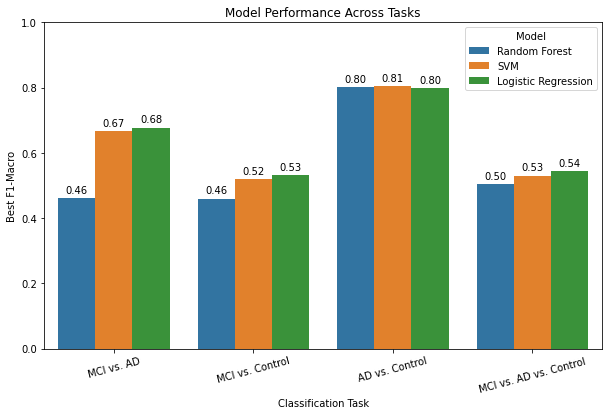

In [8]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=results_df,
    x="Task",
    y="Mean F1 Macro",
    hue="Model",
    capsize=0.1,
    errwidth=1.5
)

plt.ylim(0, 1)
plt.ylabel("Best F1-Macro")
plt.xlabel("Classification Task")
plt.title("Model Performance Across Tasks")
plt.xticks(rotation=15)
plt.legend(title="Model")

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()

In [15]:
import pandas as pd
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder

class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key): self.key = key
    def fit(self, X, y=None): return self
    def transform(self, X): return X[self.key].values  # Convert to 1D array

class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys): self.keys = keys
    def fit(self, X, y=None): return self
    def transform(self, X): return X[self.keys]  # Keep multiple numerical columns as DataFrame

df = pd.read_csv("/Users/kirillkonca/Documents/dementia_prediction/data.csv")

X = df[['speech'] + numerical_features]  # Speech (text) + Multiple numerical features
y = LabelEncoder().fit_transform(df['diagnosis'])  # Encode labels

feature_union = FeatureUnion([
    ('text_features', Pipeline([
        ('selector', TextSelector('speech')), 
        ('tfidf', TfidfVectorizer(ngram_range=(1, 3), max_features=5000))
    ])),
    ('numerical_features', Pipeline([
        ('selector', NumberSelector(numerical_features)), 
        ('scaler', StandardScaler())  # Scale all numerical features together
    ]))
])

svm_model = SVC(kernel="sigmoid", random_state=42, class_weight='balanced')

pipeline = Pipeline([
    ('features', feature_union),  # Process text and numerical features separately
    ('clf', svm_model)  # Classification model
])

param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto']
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best F1-macro score:", grid_search.best_score_)


KeyError: "['mmse'] not in index"

In [23]:
import pandas as pd

# Load the Excel file and select the "data" sheet
excel_file = pd.read_excel('/Users/kirillkonca/Downloads/Pitt/PItt-data.xlsx', sheet_name='match')

# Extract the 'id' and 'mms' columns
excel_data = excel_file[['id', 'mms']]


In [24]:
df = pd.read_csv("/Users/kirillkonca/Documents/dementia_prediction/data.csv")
merged_df = pd.merge(df, excel_data, on='id', how='left')

print(merged_df)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [18]:
import pandas as pd

# Load the "match" sheet from the Excel file
excel_df = pd.read_excel('/Users/kirillkonca/Downloads/Pitt/PItt-data.xlsx', sheet_name='match')
df = pd.read_csv('/Users/kirillkonca/Documents/dementia_prediction/data.csv')

# Extract the main ID and sub-ID
df['main_id'] = df['id'].apply(lambda x: int(x.split('-')[0]))  # Main ID as integer
df['sub_id'] = df['id'].apply(lambda x: x.split('-')[1])  # Sub-ID as a string

# Function to get the relevant mmse value
def get_mmse(row):
    main_id = row['main_id']
    sub_id = row['sub_id']
    mmse_column = f"mmse{sub_id}"
    
    # Check if the column exists in the "match" sheet
    if mmse_column in excel_df.columns:
        result = excel_df.loc[excel_df['id'] == main_id, mmse_column]
        return result.values[0] if not result.empty else None
    else:
        return None

# Apply the function to extract mmse values
df['mmse'] = df.apply(get_mmse, axis=1)

# Drop helper columns if not needed
df.drop(columns=['main_id', 'sub_id'], inplace=True)


In [19]:
filtered_df = df[df['mmse'].isna()]

In [20]:
len(filtered_df)

91

In [21]:
result = df.merge(filtered_df, on=df.columns.tolist(), how='left', indicator=True)
result = result[result['_merge'] == 'left_only'].drop(columns='_merge')

In [22]:
len(result)

449

In [23]:
len(df)

540

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=['diagnosis', 'mmse'])  # Drop rows where 'diagnosis' or 'mmse' is None

tasks = {
    "MCI vs. AD": df[df['diagnosis'].isin(['MCI', 'AD'])],
    "MCI vs. Control": df[df['diagnosis'].isin(['MCI', 'Control'])],
    "AD vs. Control": df[df['diagnosis'].isin(['AD', 'Control'])],
    "MCI vs. AD vs. Control": df
}

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average="macro")

results = []

for task_name, task_df in tasks.items():
    print(f"\n### {task_name} ###\n")
    X = task_df[['mmse']].values  # Use 'mmse' as the feature
    y = LabelEncoder().fit_transform(task_df['diagnosis'])

    for model_name, model in models.items():
        print(f"\nModel: {model_name}")
        scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

        print(f"F1-Macro: {scores.mean():.4f} ± {scores.std():.4f}")

        results.append({
            "Task": task_name,
            "Model": model_name,
            "Mean F1 Macro": scores.mean(),
            "Std F1": scores.std(),
            "Type": "mmse"
        })


### MCI vs. AD ###


Model: Random Forest
F1-Macro: 0.8200 ± 0.0743

Model: SVM
F1-Macro: 0.8200 ± 0.0743

Model: Logistic Regression
F1-Macro: 0.8200 ± 0.0743

### MCI vs. Control ###


Model: Random Forest
F1-Macro: 0.5714 ± 0.1125

Model: SVM
F1-Macro: 0.6169 ± 0.1504

Model: Logistic Regression
F1-Macro: 0.6109 ± 0.1687

### AD vs. Control ###


Model: Random Forest
F1-Macro: 0.9575 ± 0.0327

Model: SVM
F1-Macro: 0.9550 ± 0.0321

Model: Logistic Regression
F1-Macro: 0.9571 ± 0.0401

### MCI vs. AD vs. Control ###


Model: Random Forest
F1-Macro: 0.6755 ± 0.0696

Model: SVM
F1-Macro: 0.6951 ± 0.0567

Model: Logistic Regression
F1-Macro: 0.6951 ± 0.0567


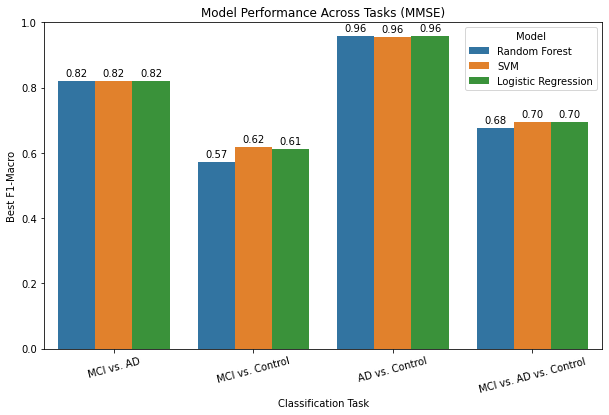

In [25]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=results_df,
    x="Task",
    y="Mean F1 Macro",
    hue="Model",
    capsize=0.1,
    errwidth=1.5
)

plt.ylim(0, 1)
plt.ylabel("Best F1-Macro")
plt.xlabel("Classification Task")
plt.title("Model Performance Across Tasks (MMSE)")
plt.xticks(rotation=15)
plt.legend(title="Model")

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()

In [26]:
df

,id,diagnosis,speech,annotation,speaking time (s),on,co,mean_sent_embs,mlu,stop_words,...,verbs_with_inflections,nouns_with_determiners,sid,sid_efficiency,pid,pid_efficiency,maas,frazier_score,words_per_clause,mmse
0,138-1,Control,there's a cookie jar on the shelf . and the li...,# sent_id = 1\n# text = there's a cookie jar o...,46.200,0.0,0.105263,0.802693,9.571429,0.589552,...,0.164179,0.186567,0.335821,0.974026,0.123539,0.324675,0.025319,0.727537,6.090909,28.0
1,631-0,Control,the kids are in the cookies . the stool is fal...,# sent_id = 1\n# text = the kids are in the co...,17.150,0.0,0.000000,0.853938,7.250000,0.534483,...,0.275862,0.155172,0.327586,1.107872,0.059091,0.233236,0.024072,0.868304,4.461538,29.0
3,121-0,Control,the boy is taking a cookie out of the cookie j...,# sent_id = 1\n# text = the boy is taking a co...,128.050,0.0,0.153846,0.801815,11.666667,0.567857,...,0.196429,0.125000,0.360714,0.788754,0.218210,0.554471,0.026686,0.719372,6.666667,30.0
4,142-3,Control,the water's running over on the floor . the st...,# sent_id = 1\n# text = the water's running ov...,16.820,0.0,0.285714,0.838216,7.000000,0.500000,...,0.190476,0.166667,0.428571,1.070155,0.280952,0.653983,0.019465,1.004314,6.000000,30.0
6,267-2,Control,mother is drying the dishes and looking out th...,# sent_id = 1\n# text = mother is drying the d...,39.710,0.0,0.000000,0.795138,10.090909,0.549550,...,0.297297,0.135135,0.405405,1.133216,0.304233,0.956938,0.023439,0.910656,6.529412,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,134-1,AD,a little boy is getting cookies out of the jar...,# sent_id = 1\n# text = a little boy is gettin...,28.030,0.0,0.000000,0.850177,8.400000,0.523810,...,0.214286,0.142857,0.380952,0.570817,0.066667,0.071352,0.017263,0.770418,4.666667,23.0
535,270-1,AD,a boy is getting a cookie from the cookie jar ...,# sent_id = 1\n# text = a boy is getting a coo...,30.679,0.0,0.214286,0.848285,8.000000,0.562500,...,0.325000,0.137500,0.375000,0.977868,0.182689,0.488934,0.025529,0.776838,5.333333,22.0
537,091-1,AD,there's a boy getting in the cookie jar . and ...,# sent_id = 1\n# text = there's a boy getting ...,25.530,0.0,0.052632,0.812186,7.777778,0.542857,...,0.271429,0.171429,0.428571,1.175088,0.194682,0.587544,0.029636,0.793386,6.363636,17.0
538,579-0,AD,woman doing dishes . climbing up to get some c...,# sent_id = 1\n# text = woman doing dishes .\n...,11.810,0.0,0.200000,0.862304,6.166667,0.540541,...,0.297297,0.135135,0.432432,1.354784,0.144841,0.508044,0.018684,1.003968,3.700000,18.0


In [27]:
df2 = pd.read_csv("/Users/kirillkonca/Documents/dementia_prediction/data_pauses.csv")

In [28]:
df2

,id,diagnosis,speech,annotation,speaking time (s),on,co,short_pause,mid_pause,long_pause
0,138-1,Control,there's a cookie jar on the shelf . and the li...,# sent_id = 1\n# text = there's a cookie jar o...,46.200,0.0,0.105263,0,0,1
1,631-0,Control,the kids are in the cookies . the stool is fal...,# sent_id = 1\n# text = the kids are in the co...,17.150,0.0,0.000000,0,0,0
2,182-3,Control,Johnny's falling off the stool . the boy's fal...,# sent_id = 1\n# text = Johnny's falling off t...,17.800,0.0,0.076923,0,0,0
3,121-0,Control,the boy is taking a cookie out of the cookie j...,# sent_id = 1\n# text = the boy is taking a co...,128.050,0.0,0.153846,0,1,0
4,142-3,Control,the water's running over on the floor . the st...,# sent_id = 1\n# text = the water's running ov...,16.820,0.0,0.285714,0,0,0
...,...,...,...,...,...,...,...,...,...,...
535,270-1,AD,a boy is getting a cookie from the cookie jar ...,# sent_id = 1\n# text = a boy is getting a coo...,30.679,0.0,0.214286,0,1,1
536,213-2,AD,I see this woman here . and she's carrying som...,# sent_id = 1\n# text = I see this woman here ...,34.100,0.0,0.296296,1,1,0
537,091-1,AD,there's a boy getting in the cookie jar . and ...,# sent_id = 1\n# text = there's a boy getting ...,25.530,0.0,0.052632,1,1,0
538,579-0,AD,woman doing dishes . climbing up to get some c...,# sent_id = 1\n# text = woman doing dishes .\n...,11.810,0.0,0.200000,0,1,0


In [29]:
import pandas as pd

# Assuming df and df2 are your dataframes, and both contain an 'id' column

# Select only the relevant columns from df2
pause_columns = ['id', 'short_pause', 'mid_pause', 'long_pause']

# Merge into df based on 'id'
result = result.merge(df2[pause_columns], on='id', how='left')


In [30]:
result

,id,diagnosis,speech,annotation,speaking time (s),on,co,mean_sent_embs,mlu,stop_words,...,sid_efficiency,pid,pid_efficiency,maas,frazier_score,words_per_clause,mmse,short_pause,mid_pause,long_pause
0,138-1,Control,there's a cookie jar on the shelf . and the li...,# sent_id = 1\n# text = there's a cookie jar o...,46.200,0.0,0.105263,0.802693,9.571429,0.589552,...,0.974026,0.123539,0.324675,0.025319,0.727537,6.090909,28.0,0,0,1
1,631-0,Control,the kids are in the cookies . the stool is fal...,# sent_id = 1\n# text = the kids are in the co...,17.150,0.0,0.000000,0.853938,7.250000,0.534483,...,1.107872,0.059091,0.233236,0.024072,0.868304,4.461538,29.0,0,0,0
2,121-0,Control,the boy is taking a cookie out of the cookie j...,# sent_id = 1\n# text = the boy is taking a co...,128.050,0.0,0.153846,0.801815,11.666667,0.567857,...,0.788754,0.218210,0.554471,0.026686,0.719372,6.666667,30.0,0,1,0
3,142-3,Control,the water's running over on the floor . the st...,# sent_id = 1\n# text = the water's running ov...,16.820,0.0,0.285714,0.838216,7.000000,0.500000,...,1.070155,0.280952,0.653983,0.019465,1.004314,6.000000,30.0,0,0,0
4,267-2,Control,mother is drying the dishes and looking out th...,# sent_id = 1\n# text = mother is drying the d...,39.710,0.0,0.000000,0.795138,10.090909,0.549550,...,1.133216,0.304233,0.956938,0.023439,0.910656,6.529412,30.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,134-1,AD,a little boy is getting cookies out of the jar...,# sent_id = 1\n# text = a little boy is gettin...,28.030,0.0,0.000000,0.850177,8.400000,0.523810,...,0.570817,0.066667,0.071352,0.017263,0.770418,4.666667,23.0,0,1,0
445,270-1,AD,a boy is getting a cookie from the cookie jar ...,# sent_id = 1\n# text = a boy is getting a coo...,30.679,0.0,0.214286,0.848285,8.000000,0.562500,...,0.977868,0.182689,0.488934,0.025529,0.776838,5.333333,22.0,0,1,1
446,091-1,AD,there's a boy getting in the cookie jar . and ...,# sent_id = 1\n# text = there's a boy getting ...,25.530,0.0,0.052632,0.812186,7.777778,0.542857,...,1.175088,0.194682,0.587544,0.029636,0.793386,6.363636,17.0,1,1,0
447,579-0,AD,woman doing dishes . climbing up to get some c...,# sent_id = 1\n# text = woman doing dishes .\n...,11.810,0.0,0.200000,0.862304,6.166667,0.540541,...,1.354784,0.144841,0.508044,0.018684,1.003968,3.700000,18.0,0,1,0


In [15]:
result.to_csv("data_mmse.csv", index=False)